# Data Cleaning 

In [245]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
import scipy.stats as stats

# Questions 
* Demand for fitness trackers
* Which brand has the highest number of products?
* Number of Players in the mid-priced market
* Average Selling Price by Brand?
* What are the minimum features expected in a mid-price product
* Are fitness trackers (in mid price range) with higher ratings are more expensive?


In [50]:
df = pd.read_csv("raw_data.csv")
df

,Brand Name,Model,Manufacturer Part Number,Dealer Part Number,Rating,Number of Reviews,Value,Size,Screen Size(mm),Display,...,Compatible OS,Colour,Case Finish,Case Weight,Features,Connectivity,Band size Min,Environmental Requirements,Battery Capacity,Battery Life
0,Apple,Apple Watch Nike Series 7,MKN33X/A,WTHAPP5329184,5 out of 5 Stars,NaN,$460.00,41.0,NaN,NaN,...,iOS,Starlight,Aluminum,24.6,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Apple Watch Nike Series 7,MKNC3X/A,WTHAPP5329192,5 out of 5 Stars,2.0,$503.47,45.0,NaN,NaN,...,iOS,Midnight,Aluminum,24.7,NaN,NaN,NaN,NaN,NaN,NaN
2,Apple,Apple Watch SE (2nd gen),MNJP3ZP/A,WTHAPP5623154,5 out of 5 Stars,13.0,$407.82,40.0,28.0,OLED,...,iOS,Starlight,Aluminum,24.8,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway...",Wi-Fi 802.11b/g/n 2.4GHzBluetooth 5.0,NaN,NaN,NaN,NaN
3,Apple,Apple Watch SE (2nd gen),MNJT3ZP/A,WTHAPP5623155,5 out of 5 Stars,8.0,$407.82,40.0,28.0,OLED,...,iOS,Midnight,Aluminum,24..9,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway...",Wi-Fi 802.11b/g/n 2.4GHzBluetooth 5.0,NaN,NaN,NaN,NaN
4,Apple,Apple Watch SE (2nd gen),MNK03ZP/A,WTHAPP5623158,4.8 out of 5 Stars,11.0,$451.30,44.0,31.0,OLED,...,iOS,Midnight,Aluminum,32.9,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway...",Wi-Fi 802.11b/g/n 2.4GHzBluetooth 5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Samsung,Samsung Galaxy Watch5 Pro,SM-R920NZTAXNZ,WTHSAM920001,5 out of 5 Stars,4.0,$651.30,45.0,35.0,Sapphire crystal,...,Android,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5441AP,WTHMIX35917,4.6 out of 5 Stars,45.0,$81.74,41.0,39.0,TFT,...,iOS / Android,Black,NaN,35,"Optical heart rate sensor, accelerometer, gyro...",Bluetooth 5.0 (Bluetooth Low Energy),140-210mm,NaN,262mAh,10.0
103,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5443AP,WTHMIX35919,4.2 out of 5 Stars,24.0,$81.74,41.0,39.0,TFT,...,iOS / Android,Blue,NaN,35,"Optical heart rate sensor, accelerometer, gyro...",Bluetooth 5.0 (Bluetooth Low Energy),140-210mm,NaN,262mAh,10.0
104,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5442AP,WTHMIX35918,4.8 out of 5 Stars,11.0,$81.74,41.0,39.0,TFT,...,iOS / Android,Beige,NaN,35,"Optical heart rate sensor, accelerometer, gyro...",Bluetooth 5.0 (Bluetooth Low Energy),140-210mm,NaN,262mAh,10.0


In [51]:
df = df.drop(105)

In [52]:
df.tail()

,Brand Name,Model,Manufacturer Part Number,Dealer Part Number,Rating,Number of Reviews,Value,Size,Screen Size(mm),Display,...,Compatible OS,Colour,Case Finish,Case Weight,Features,Connectivity,Band size Min,Environmental Requirements,Battery Capacity,Battery Life
100,Samsung,Samsung Galaxy Watch5 Pro,SM-R920NZKAXNZ,WTHSAM920000,4.7 out of 5 Stars,11.0,$651.30,45.0,35.0,Super AMOLED,...,Android,Black,NaN,NaN,"Accelerometer,Barometer,Bioelectrical Impedanc...","802.11 a/b/g/n 2.4+5GHz,GPS,Glonass,Beidou,Gal...",NaN,NaN,590mAh,NaN
101,Samsung,Samsung Galaxy Watch5 Pro,SM-R920NZTAXNZ,WTHSAM920001,5 out of 5 Stars,4.0,$651.30,45.0,35.0,Sapphire crystal,...,Android,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5441AP,WTHMIX35917,4.6 out of 5 Stars,45.0,$81.74,41.0,39.0,TFT,...,iOS / Android,Black,NaN,35,"Optical heart rate sensor, accelerometer, gyro...",Bluetooth 5.0 (Bluetooth Low Energy),140-210mm,NaN,262mAh,10.0
103,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5443AP,WTHMIX35919,4.2 out of 5 Stars,24.0,$81.74,41.0,39.0,TFT,...,iOS / Android,Blue,NaN,35,"Optical heart rate sensor, accelerometer, gyro...",Bluetooth 5.0 (Bluetooth Low Energy),140-210mm,NaN,262mAh,10.0
104,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5442AP,WTHMIX35918,4.8 out of 5 Stars,11.0,$81.74,41.0,39.0,TFT,...,iOS / Android,Beige,NaN,35,"Optical heart rate sensor, accelerometer, gyro...",Bluetooth 5.0 (Bluetooth Low Energy),140-210mm,NaN,262mAh,10.0


In [246]:
for i, val in enumerate(df.Value):
    df['Value'] = df['Value'].astype(str).str.replace('$', '')
    df['Value'] = df['Value'].str.replace(',', '') 
    df['Value']= df['Value'].astype(float)
df

C:\Users\sheri\AppData\Local\Temp\ipykernel_9352\417054857.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Value'] = df['Value'].astype(str).str.replace('$', '')


,Brand Name,Model,Manufacturer Part Number,Dealer Part Number,Rating,Number of Reviews,Value,Size,Screen Size(mm),Display,...,Waterproof Rating,Compatible OS,Colour,Case Finish,Case Weight,Band size Min,Environmental Requirements,Battery Capacity,Battery Life,calling features
0,Apple,Apple Watch Nike Series 7,MKN33X/A,WTHAPP5329184,5,NaN,460.00,41.0,NaN,NaN,...,5 ATM,iOS,Starlight,Aluminum,24.6,NaN,NaN,NaN,NaN,NaN
1,Apple,Apple Watch Nike Series 7,MKNC3X/A,WTHAPP5329192,5,2.0,503.47,45.0,NaN,NaN,...,5 ATM,iOS,Midnight,Aluminum,24.7,NaN,NaN,NaN,NaN,NaN
2,Apple,Apple Watch SE (2nd gen),MNJP3ZP/A,WTHAPP5623154,5,13.0,407.82,40.0,28.0,OLED,...,5 ATM,iOS,Starlight,Aluminum,24.8,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
3,Apple,Apple Watch SE (2nd gen),MNJT3ZP/A,WTHAPP5623155,5,8.0,407.82,40.0,28.0,OLED,...,5 ATM,iOS,Midnight,Aluminum,24..9,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
4,Apple,Apple Watch SE (2nd gen),MNK03ZP/A,WTHAPP5623158,4.8,11.0,451.30,44.0,31.0,OLED,...,5 ATM,iOS,Midnight,Aluminum,32.9,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Samsung,Samsung Galaxy Watch5 Pro,SM-R920NZKAXNZ,WTHSAM920000,4.7,11.0,651.30,45.0,35.0,Super AMOLED,...,5 ATM,Android,Black,NaN,NaN,NaN,NaN,590mAh,NaN,"Accelerometer,Barometer,Bioelectrical Impedanc..."
101,Samsung,Samsung Galaxy Watch5 Pro,SM-R920NZTAXNZ,WTHSAM920001,5,4.0,651.30,45.0,35.0,Sapphire crystal,...,5 ATM,Android,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5441AP,WTHMIX35917,4.6,45.0,81.74,41.0,39.0,TFT,...,5 ATM,iOS / Android,Black,NaN,35,140-210mm,NaN,262mAh,10.0,"Optical heart rate sensor, accelerometer, gyro..."
103,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5443AP,WTHMIX35919,4.2,24.0,81.74,41.0,39.0,TFT,...,5 ATM,iOS / Android,Blue,NaN,35,140-210mm,NaN,262mAh,10.0,"Optical heart rate sensor, accelerometer, gyro..."


In [55]:
for i, val in enumerate(df.Rating):
    df['Rating'] = df['Rating'].str.split().str[0]
df

,Brand Name,Model,Manufacturer Part Number,Dealer Part Number,Rating,Number of Reviews,Value,Size,Screen Size(mm),Display,...,Compatible OS,Colour,Case Finish,Case Weight,Features,Connectivity,Band size Min,Environmental Requirements,Battery Capacity,Battery Life
0,Apple,Apple Watch Nike Series 7,MKN33X/A,WTHAPP5329184,5,NaN,460.00,41.0,NaN,NaN,...,iOS,Starlight,Aluminum,24.6,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Apple Watch Nike Series 7,MKNC3X/A,WTHAPP5329192,5,2.0,503.47,45.0,NaN,NaN,...,iOS,Midnight,Aluminum,24.7,NaN,NaN,NaN,NaN,NaN,NaN
2,Apple,Apple Watch SE (2nd gen),MNJP3ZP/A,WTHAPP5623154,5,13.0,407.82,40.0,28.0,OLED,...,iOS,Starlight,Aluminum,24.8,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway...",Wi-Fi 802.11b/g/n 2.4GHzBluetooth 5.0,NaN,NaN,NaN,NaN
3,Apple,Apple Watch SE (2nd gen),MNJT3ZP/A,WTHAPP5623155,5,8.0,407.82,40.0,28.0,OLED,...,iOS,Midnight,Aluminum,24..9,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway...",Wi-Fi 802.11b/g/n 2.4GHzBluetooth 5.0,NaN,NaN,NaN,NaN
4,Apple,Apple Watch SE (2nd gen),MNK03ZP/A,WTHAPP5623158,4.8,11.0,451.30,44.0,31.0,OLED,...,iOS,Midnight,Aluminum,32.9,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway...",Wi-Fi 802.11b/g/n 2.4GHzBluetooth 5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Samsung,Samsung Galaxy Watch5 Pro,SM-R920NZKAXNZ,WTHSAM920000,4.7,11.0,651.30,45.0,35.0,Super AMOLED,...,Android,Black,NaN,NaN,"Accelerometer,Barometer,Bioelectrical Impedanc...","802.11 a/b/g/n 2.4+5GHz,GPS,Glonass,Beidou,Gal...",NaN,NaN,590mAh,NaN
101,Samsung,Samsung Galaxy Watch5 Pro,SM-R920NZTAXNZ,WTHSAM920001,5,4.0,651.30,45.0,35.0,Sapphire crystal,...,Android,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5441AP,WTHMIX35917,4.6,45.0,81.74,41.0,39.0,TFT,...,iOS / Android,Black,NaN,35,"Optical heart rate sensor, accelerometer, gyro...",Bluetooth 5.0 (Bluetooth Low Energy),140-210mm,NaN,262mAh,10.0
103,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5443AP,WTHMIX35919,4.2,24.0,81.74,41.0,39.0,TFT,...,iOS / Android,Blue,NaN,35,"Optical heart rate sensor, accelerometer, gyro...",Bluetooth 5.0 (Bluetooth Low Energy),140-210mm,NaN,262mAh,10.0


In [56]:
df.columns


Index(['Brand Name', 'Model', 'Manufacturer Part Number', 'Dealer Part Number',
       'Rating', 'Number of Reviews', 'Value', 'Size', 'Screen Size(mm)',
       'Display', 'Heart Rate Monitor', 'Waterproof Rating', 'Compatible OS',
       'Colour', 'Case Finish', 'Case Weight', 'Features', 'Connectivity',
       'Band size Min', 'Environmental Requirements', 'Battery Capacity',
       'Battery Life'],
      dtype='object')

In [57]:
df['calling features'] = df['Features'] + ' ' + df['Connectivity']
df = df.drop(['Features','Connectivity'], axis=1)

In [58]:
df

,Brand Name,Model,Manufacturer Part Number,Dealer Part Number,Rating,Number of Reviews,Value,Size,Screen Size(mm),Display,...,Waterproof Rating,Compatible OS,Colour,Case Finish,Case Weight,Band size Min,Environmental Requirements,Battery Capacity,Battery Life,calling features
0,Apple,Apple Watch Nike Series 7,MKN33X/A,WTHAPP5329184,5,NaN,460.00,41.0,NaN,NaN,...,5 ATM,iOS,Starlight,Aluminum,24.6,NaN,NaN,NaN,NaN,NaN
1,Apple,Apple Watch Nike Series 7,MKNC3X/A,WTHAPP5329192,5,2.0,503.47,45.0,NaN,NaN,...,5 ATM,iOS,Midnight,Aluminum,24.7,NaN,NaN,NaN,NaN,NaN
2,Apple,Apple Watch SE (2nd gen),MNJP3ZP/A,WTHAPP5623154,5,13.0,407.82,40.0,28.0,OLED,...,5 ATM,iOS,Starlight,Aluminum,24.8,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
3,Apple,Apple Watch SE (2nd gen),MNJT3ZP/A,WTHAPP5623155,5,8.0,407.82,40.0,28.0,OLED,...,5 ATM,iOS,Midnight,Aluminum,24..9,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
4,Apple,Apple Watch SE (2nd gen),MNK03ZP/A,WTHAPP5623158,4.8,11.0,451.30,44.0,31.0,OLED,...,5 ATM,iOS,Midnight,Aluminum,32.9,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Samsung,Samsung Galaxy Watch5 Pro,SM-R920NZKAXNZ,WTHSAM920000,4.7,11.0,651.30,45.0,35.0,Super AMOLED,...,5 ATM,Android,Black,NaN,NaN,NaN,NaN,590mAh,NaN,"Accelerometer,Barometer,Bioelectrical Impedanc..."
101,Samsung,Samsung Galaxy Watch5 Pro,SM-R920NZTAXNZ,WTHSAM920001,5,4.0,651.30,45.0,35.0,Sapphire crystal,...,5 ATM,Android,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5441AP,WTHMIX35917,4.6,45.0,81.74,41.0,39.0,TFT,...,5 ATM,iOS / Android,Black,NaN,35,140-210mm,NaN,262mAh,10.0,"Optical heart rate sensor, accelerometer, gyro..."
103,Xiaomi,Xiaomi Redmi Watch 2 Lite,BHR5443AP,WTHMIX35919,4.2,24.0,81.74,41.0,39.0,TFT,...,5 ATM,iOS / Android,Blue,NaN,35,140-210mm,NaN,262mAh,10.0,"Optical heart rate sensor, accelerometer, gyro..."


In [59]:
Features_col = ['Accelerometer', 'Gyroscope',"Stress","ECG", 'Compass','Fall Detection',"Calling",'SOS','Magnetometer', 'Optical heart rate','infrared oxygen saturation SpO2','GNS',"NFC","Bluetooth",'Ambient Light','Wi-Fi','Altimeter', 'Barometer', 'Temperature','Microphone','Speaker']

In [61]:
df.columns


Index(['Brand Name', 'Model', 'Manufacturer Part Number', 'Dealer Part Number',
       'Rating', 'Number of Reviews', 'Value', 'Size', 'Screen Size(mm)',
       'Display', 'Heart Rate Monitor', 'Waterproof Rating', 'Compatible OS',
       'Colour', 'Case Finish', 'Case Weight', 'Band size Min',
       'Environmental Requirements', 'Battery Capacity', 'Battery Life',
       'calling features'],
      dtype='object')

In [62]:
df.head(30)


,Brand Name,Model,Manufacturer Part Number,Dealer Part Number,Rating,Number of Reviews,Value,Size,Screen Size(mm),Display,...,Waterproof Rating,Compatible OS,Colour,Case Finish,Case Weight,Band size Min,Environmental Requirements,Battery Capacity,Battery Life,calling features
0,Apple,Apple Watch Nike Series 7,MKN33X/A,WTHAPP5329184,5,NaN,460.00,41.0,NaN,NaN,...,5 ATM,iOS,Starlight,Aluminum,24.6,NaN,NaN,NaN,NaN,NaN
1,Apple,Apple Watch Nike Series 7,MKNC3X/A,WTHAPP5329192,5,2.0,503.47,45.0,NaN,NaN,...,5 ATM,iOS,Midnight,Aluminum,24.7,NaN,NaN,NaN,NaN,NaN
2,Apple,Apple Watch SE (2nd gen),MNJP3ZP/A,WTHAPP5623154,5,13.0,407.82,40.0,28.0,OLED,...,5 ATM,iOS,Starlight,Aluminum,24.8,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
3,Apple,Apple Watch SE (2nd gen),MNJT3ZP/A,WTHAPP5623155,5,8.0,407.82,40.0,28.0,OLED,...,5 ATM,iOS,Midnight,Aluminum,24..9,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
4,Apple,Apple Watch SE (2nd gen),MNK03ZP/A,WTHAPP5623158,4.8,11.0,451.30,44.0,31.0,OLED,...,5 ATM,iOS,Midnight,Aluminum,32.9,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
5,Apple,Apple Watch SE (2nd gen),MNJX3ZP/A,WTHAPP5623157,5,3.0,451.30,44.0,31.0,OLED,...,5 ATM,iOS,Starlight,Aluminum,32.9,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
6,Apple,Apple Watch SE (2nd gen),MNJV3ZP/A,WTHAPP5623156,5,2.0,407.83,40.0,28.0,OLED,...,5 ATM,iOS,White,Aluminum,26.4,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
7,Apple,Apple Watch SE (2nd gen),MNK23ZP/A,WTHAPP5623159,5,1.0,451.30,44.0,31.0,OLED,...,5 ATM,iOS,White,Aluminum,32.9,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
8,Apple,Apple Watch SE (2nd gen),MNPL3ZP/A,WTHAPP5623176,NaN,NaN,494.78,40.0,28.0,OLED,...,5 ATM,iOS,Midnight,Aluminum,26.4,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."
9,Apple,Apple Watch SE (2nd gen),MNPP3ZP/A,WTHAPP5623177,NaN,NaN,494.78,40.0,28.0,OLED,...,5 ATM,iOS,White,Aluminum,26.4,NaN,NaN,NaN,NaN,"L1 GPS, GLONASS, Galileo, and QZSSCompassAlway..."


In [68]:
# Create a copy of the original DataFrame
df_new = df.copy()
df_new["calling features"]

0                                                    NaN
1                                                    NaN
2      L1 GPS, GLONASS, Galileo, and QZSSCompassAlway...
3      L1 GPS, GLONASS, Galileo, and QZSSCompassAlway...
4      L1 GPS, GLONASS, Galileo, and QZSSCompassAlway...
                             ...                        
100    Accelerometer,Barometer,Bioelectrical Impedanc...
101                                                  NaN
102    Optical heart rate sensor, accelerometer, gyro...
103    Optical heart rate sensor, accelerometer, gyro...
104    Optical heart rate sensor, accelerometer, gyro...
Name: calling features, Length: 105, dtype: object

In [69]:

# Create new columns based on Features_col
for feature in Features_col:
    # Create a new column with default value 'No'
    df_new[feature] = 'No'

# Iterate over each entry in the "calling features" column
for i, val in enumerate(df_new["calling features"]):
    matching_words = []

    # Check if the value is a string
    if isinstance(val, str):
        string_to_search = val

        # Remove the word "meter" from the string_to_search
        string_to_search = string_to_search.replace("meter", "")

        if len(string_to_search) <= 100:
            matching_ratio_threshold = 90
        else:
            matching_ratio_threshold = 90

        # Iterate over 3-letter substrings in the string_to_search
        for j in range(len(string_to_search) - 2):
            substring = string_to_search[j:j+3]

            # Iterate over the desired words in Features_col
            for feature in Features_col:
                # Calculate the partial ratio between the feature and the substring
                partial_ratio = fuzz.partial_ratio(feature.lower(), substring.lower())

                # Check if the partial ratio meets the threshold
                if partial_ratio >= matching_ratio_threshold:
                    # Check if the original feature ends with "meter"
                    if feature.lower().endswith("meter"):
                        matching_words.append(feature)
                    else:
                        matching_words.append(feature.replace("meter", ""))

        # Remove duplicates from the matching_words list
        matching_words = list(set(matching_words))

    # Update the corresponding columns in the DataFrame
    if matching_words:
        for feature in Features_col:
            if feature in matching_words:
                df_new.loc[i, feature] = 'Yes'
            else:
                df_new.loc[i, feature] = 'No'
    else:
        for feature in Features_col:
            df_new.loc[i, feature] = np.nan

    # Print the matching words
    print(matching_words)


[]
[]
['Calling', 'Wi-Fi', 'Ambient Light', 'Optical heart rate', 'Stress', 'infrared oxygen saturation SpO2', 'Fall Detection', 'Temperature', 'Altimeter', 'Microphone', 'Speaker', 'Compass', 'Accelerometer', 'Magnetometer', 'Bluetooth', 'Gyroscope', 'Barometer', 'SOS']
['Calling', 'Wi-Fi', 'Ambient Light', 'Optical heart rate', 'Stress', 'infrared oxygen saturation SpO2', 'Fall Detection', 'Temperature', 'Altimeter', 'Microphone', 'Speaker', 'Compass', 'Accelerometer', 'Magnetometer', 'Bluetooth', 'Gyroscope', 'Barometer', 'SOS']
['Calling', 'Wi-Fi', 'Ambient Light', 'Optical heart rate', 'Stress', 'infrared oxygen saturation SpO2', 'Fall Detection', 'Temperature', 'Altimeter', 'Microphone', 'Speaker', 'Compass', 'Accelerometer', 'Magnetometer', 'Bluetooth', 'Gyroscope', 'Barometer', 'SOS']
['Calling', 'Wi-Fi', 'Ambient Light', 'Optical heart rate', 'Stress', 'infrared oxygen saturation SpO2', 'Fall Detection', 'Temperature', 'Altimeter', 'Microphone', 'Speaker', 'Compass', 'Accelero

['Calling', 'Wi-Fi', 'Ambient Light', 'Optical heart rate', 'Stress', 'infrared oxygen saturation SpO2', 'Fall Detection', 'Temperature', 'Altimeter', 'Microphone', 'Speaker', 'Compass', 'Accelerometer', 'Magnetometer', 'Bluetooth', 'Gyroscope', 'Barometer', 'SOS']
['Calling', 'Wi-Fi', 'Ambient Light', 'Optical heart rate', 'Stress', 'infrared oxygen saturation SpO2', 'Fall Detection', 'Temperature', 'Altimeter', 'Microphone', 'Speaker', 'Compass', 'Accelerometer', 'Magnetometer', 'Bluetooth', 'Gyroscope', 'Barometer', 'SOS']
['Calling', 'Wi-Fi', 'Ambient Light', 'Optical heart rate', 'Stress', 'infrared oxygen saturation SpO2', 'Fall Detection', 'Temperature', 'Altimeter', 'Microphone', 'Speaker', 'Compass', 'Accelerometer', 'Magnetometer', 'Bluetooth', 'Gyroscope', 'Barometer', 'SOS']
['Calling', 'Wi-Fi', 'Ambient Light', 'Optical heart rate', 'Stress', 'infrared oxygen saturation SpO2', 'Fall Detection', 'Temperature', 'Altimeter', 'Microphone', 'Speaker', 'Compass', 'Accelerometer'

In [70]:
df_new.columns


Index(['Brand Name', 'Model', 'Manufacturer Part Number', 'Dealer Part Number',
       'Rating', 'Number of Reviews', 'Value', 'Size', 'Screen Size(mm)',
       'Display', 'Heart Rate Monitor', 'Waterproof Rating', 'Compatible OS',
       'Colour', 'Case Finish', 'Case Weight', 'Band size Min',
       'Environmental Requirements', 'Battery Capacity', 'Battery Life',
       'calling features', 'Accelerometer', 'Gyroscope', 'Stress', 'ECG',
       'Compass', 'Fall Detection', 'Calling', 'SOS', 'Magnetometer',
       'Optical heart rate', 'infrared oxygen saturation SpO2', 'GNS', 'NFC',
       'Bluetooth', 'Ambient Light', 'Wi-Fi', 'Altimeter', 'Barometer',
       'Temperature', 'Microphone', 'Speaker'],
      dtype='object')

In [72]:
df_new.isna().sum()

Brand Name                          0
Model                               0
Manufacturer Part Number            2
Dealer Part Number                  0
Rating                             51
Number of Reviews                  52
Value                               0
Size                                1
Screen Size(mm)                     2
Display                            24
Heart Rate Monitor                  0
Waterproof Rating                   0
Compatible OS                       0
Colour                              0
Case Finish                        33
Case Weight                        44
Band size Min                      87
Environmental Requirements         83
Battery Capacity                   93
Battery Life                       78
calling features                   38
Accelerometer                      38
Gyroscope                          38
Stress                             38
ECG                                38
Compass                            38
Fall Detecti

In [76]:
data_processed = df_new.drop(['Dealer Part Number','Heart Rate Monitor','Band size Min','Environmental Requirements','Battery Capacity','calling features'],axis = 1)

In [77]:
data= data_processed.copy()


In [81]:
data.describe()


,Rating,Number of Reviews,Value,Size,Screen Size(mm),Battery Life
count,54.000000,53.000000,105.000000,104.000000,103.000000,27.000000
mean,4.520370,8.056604,643.525429,43.067308,30.747573,7.037037
std,0.866653,12.796356,405.911418,3.814292,6.923558,2.954546
min,1.000000,1.000000,64.350000,36.000000,0.000000,5.000000
25%,4.500000,1.000000,346.950000,40.000000,30.000000,5.000000
50%,4.800000,3.000000,494.780000,44.000000,34.000000,6.000000
75%,5.000000,11.000000,851.300000,45.000000,34.000000,7.000000
max,5.000000,78.000000,1346.960000,49.000000,39.000000,14.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand Name                       105 non-null    object 
 1   Model                            105 non-null    object 
 2   Manufacturer Part Number         103 non-null    object 
 3   Rating                           54 non-null     float64
 4   Number of Reviews                53 non-null     float64
 5   Value                            105 non-null    float64
 6   Size                             104 non-null    float64
 7   Screen Size(mm)                  103 non-null    float64
 8   Display                          81 non-null     object 
 9   Waterproof Rating                105 non-null    object 
 10  Compatible OS                    105 non-null    object 
 11  Colour                           105 non-null    object 
 12  Case Finish           

# Filling NAN's

In [84]:
data_grouped = data.groupby("Model")
data_sorted = data_grouped.apply(lambda x: x.sort_values("Rating"))
largest_group_size = data_grouped.size().max()

data_sorted.fillna(method="ffill", limit=largest_group_size, inplace=True)

data_sorted.head(20)

Brand Name                      Model  \
Model                                                                
Apple Watch Nike Series 7 0       Apple  Apple Watch Nike Series 7   
                          1       Apple  Apple Watch Nike Series 7   
Apple Watch SE (2nd gen)  4       Apple   Apple Watch SE (2nd gen)   
                          2       Apple   Apple Watch SE (2nd gen)   
                          3       Apple   Apple Watch SE (2nd gen)   
                          5       Apple   Apple Watch SE (2nd gen)   
                          6       Apple   Apple Watch SE (2nd gen)   
                          7       Apple   Apple Watch SE (2nd gen)   
                          8       Apple   Apple Watch SE (2nd gen)   
                          9       Apple   Apple Watch SE (2nd gen)   
                          10      Apple   Apple Watch SE (2nd gen)   
                          11      Apple   Apple Watch SE (2nd gen)   
Apple Watch Series 3      12      Apple       Apple Watch Series 3   
Apple Watch Series 7      13      Apple       Apple Watch Series 7   
                          14      Apple       Apple Watch Series 7   
                          15      Apple       Apple Watch Series 7   
Apple Watch Series 8      17      Apple       Apple Watch Series 8   
                          30      Apple       Apple Watch Series 8   
                          18      Apple       Apple Watch Series 8   
                          16      Apple       Apple Watch Series 8   

                             Manufacturer Part Number  Rating  \
Model                                                           
Apple Watch Nike Series 7 0                  MKN33X/A     5.0   
                          1                  MKNC3X/A     5.0   
Apple Watch SE (2nd gen)  4                 MNK03ZP/A     4.8   
                          2                 MNJP3ZP/A     5.0   
                          3                 MNJT3ZP/A     5.0   
                          5                 MNJX3ZP/A     5.0   
                          6                 MNJV3ZP/A     5.0   
                          7                 MNK23ZP/A     5.0   
                          8                 MNPL3ZP/A     5.0   
                          9                 MNPP3ZP/A     5.0   
                          10                MNPT3ZP/A     5.0   
                          11                MNPY3ZP/A     5.0   
Apple Watch Series 3      12                 MTF22X/A     4.9   
Apple Watch Series 7      13                 MKJ03X/A     4.9   
                          14                 MKJQ3X/A     4.9   
                          15                 MKJY3X/A     4.9   
Apple Watch Series 8      17                MNP63ZP/A     4.7   
                          30                MP6N3ZP/A     4.7   
                          18                MNP53ZP/A     4.8   
                          16                MNP13ZP/A     5.0   

                              Number of Reviews    Value  Size  \
Model                                                            
Apple Watch Nike Series 7 0                 NaN   460.00  41.0   
                          1                 2.0   503.47  45.0   
Apple Watch SE (2nd gen)  4                11.0   451.30  44.0   
                          2                13.0   407.82  40.0   
                          3                 8.0   407.82  40.0   
                          5                 3.0   451.30  44.0   
                          6                 2.0   407.83  40.0   
                          7                 1.0   451.30  44.0   
                          8                 1.0   494.78  40.0   
                          9                 1.0   494.78  40.0   
                          10                1.0   538.26  44.0   
                          11                1.0   538.26  44.0   
Apple Watch Series 3      12               78.0   233.91  42.0   
Apple Watch Series 7      13               78.0   999.13  41.0   
 

In [86]:
data_sorted.isna().sum()

Brand Name                          0
Model                               0
Manufacturer Part Number            0
Rating                              0
Number of Reviews                   1
Value                               0
Size                                0
Screen Size(mm)                     2
Display                             2
Waterproof Rating                   0
Compatible OS                       0
Colour                              0
Case Finish                         4
Case Weight                         6
Battery Life                       55
Accelerometer                       2
Gyroscope                           2
Stress                              2
ECG                                 2
Compass                             2
Fall Detection                      2
Calling                             2
SOS                                 2
Magnetometer                        2
Optical heart rate                  2
infrared oxygen saturation SpO2     2
GNS         

In [88]:
for col in data_sorted.columns:
    # Check if the column is in the feature_col list
    if col in Features_col:
        # Fill NaN values with "No"
        data_sorted[col].fillna("PDA", inplace=True)
    else:
        # Fill NaN values with mode for object type columns
        if data_sorted[col].dtype == "object":
            data_sorted[col].fillna(data_sorted[col].mode()[0], inplace=True)
        # Fill NaN values with mean for numerical type columns
        else:
            data_sorted[col].fillna(data_sorted[col].mean(), inplace=True)

In [ ]:
import re

# Define the regular expression pattern to find similar cases
pattern = r'\d+\.\.\d+'

# Find all similar cases in the 'Case Weight' column
similar_cases = data_sorted['Case Weight'].str.contains(pattern, regex=True)

# Replace the similar cases with the corrected values
data_sorted.loc[similar_cases, 'Case Weight'] = data_sorted.loc[similar_cases, 'Case Weight'].str.replace(pattern, lambda match: match.group(0).replace('..', '.'), regex=True)
# Find all cases with non-numeric characters in the 'Case Weight' column
non_numeric_cases = data_sorted['Case Weight'].str.contains(r'\D', regex=True)

# Remove non-numeric characters and convert to float
data_sorted.loc[non_numeric_cases, 'Case Weight'] = data_sorted.loc[non_numeric_cases, 'Case Weight'].str.replace(r'\D', '', regex=True).astype(float)
data_sorted['Case Weight'] = data_sorted['Case Weight'].astype(float)

In [90]:
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 105 entries, ('Apple Watch Nike Series 7', 0) to ('Xiaomi Redmi Watch 2 Lite', 104)
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand Name                       105 non-null    object 
 1   Model                            105 non-null    object 
 2   Manufacturer Part Number         105 non-null    object 
 3   Rating                           105 non-null    float64
 4   Number of Reviews                105 non-null    float64
 5   Value                            105 non-null    float64
 6   Size                             105 non-null    float64
 7   Screen Size(mm)                  105 non-null    float64
 8   Display                          105 non-null    object 
 9   Waterproof Rating                105 non-null    object 
 10  Compatible OS                    105 non-null    object 
 11  Colour                

In [91]:
data_sorted.head(40)

Brand Name                      Model  \
Model                                                                
Apple Watch Nike Series 7 0       Apple  Apple Watch Nike Series 7   
                          1       Apple  Apple Watch Nike Series 7   
Apple Watch SE (2nd gen)  4       Apple   Apple Watch SE (2nd gen)   
                          2       Apple   Apple Watch SE (2nd gen)   
                          3       Apple   Apple Watch SE (2nd gen)   
                          5       Apple   Apple Watch SE (2nd gen)   
                          6       Apple   Apple Watch SE (2nd gen)   
                          7       Apple   Apple Watch SE (2nd gen)   
                          8       Apple   Apple Watch SE (2nd gen)   
                          9       Apple   Apple Watch SE (2nd gen)   
                          10      Apple   Apple Watch SE (2nd gen)   
                          11      Apple   Apple Watch SE (2nd gen)   
Apple Watch Series 3      12      Apple       Apple Watch Series 3   
Apple Watch Series 7      13      Apple       Apple Watch Series 7   
                          14      Apple       Apple Watch Series 7   
                          15      Apple       Apple Watch Series 7   
Apple Watch Series 8      17      Apple       Apple Watch Series 8   
                          30      Apple       Apple Watch Series 8   
                          18      Apple       Apple Watch Series 8   
                          16      Apple       Apple Watch Series 8   
                          25      Apple       Apple Watch Series 8   
                          19      Apple       Apple Watch Series 8   
                          20      Apple       Apple Watch Series 8   
                          21      Apple       Apple Watch Series 8   
                          22      Apple       Apple Watch Series 8   
                          23      Apple       Apple Watch Series 8   
                          24      Apple       Apple Watch Series 8   
                          26      Apple       Apple Watch Series 8   
                          27      Apple       Apple Watch Series 8   
                          28      Apple       Apple Watch Series 8   
                          29      Apple       Apple Watch Series 8   
                          31      Apple       Apple Watch Series 8   
                          32      Apple       Apple Watch Series 8   
                          33      Apple       Apple Watch Series 8   
                          34      Apple       Apple Watch Series 8   
                          35      Apple       Apple Watch Series 8   
                          36      Apple       Apple Watch Series 8   
Apple Watch Ultra         37      Apple          Apple Watch Ultra   
                          44      Apple          Apple Watch Ultra   
                          45      Apple          Apple Watch Ultra   

                             Manufacturer Part Number  Rating  \
Model                                                           
Apple Watch Nike Series 7 0                  MKN33X/A     5.0   
                          1                  MKNC3X/A     5.0   
Apple Watch SE (2nd gen)  4                 MNK03ZP/A     4.8   
                          2                 MNJP3ZP/A     5.0   
                          3                 MNJT3ZP/A     5.0   
                          5                 MNJX3ZP/A     5.0   
                          6                 MNJV3ZP/A     5.0   
                          7                 MNK23ZP/A     5.0   
                          8                 MNPL3ZP/A     5.0   
                          9                 MNPP3ZP/A     5.0   
                          10                MNPT3ZP/A     5.0   
                          11                MNPY3ZP/A     5.0   
Apple Watch Series 3      12                 MTF22X/A     4.9   
Apple Watch Series 7      13                 MKJ03X/A     4.9   
                          14                 MKJ

In [92]:
data2 = data_sorted.copy()

In [93]:
data2['NFC'].unique().sum()

'PDANoYes'

In [94]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 105 entries, ('Apple Watch Nike Series 7', 0) to ('Xiaomi Redmi Watch 2 Lite', 104)
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand Name                       105 non-null    object 
 1   Model                            105 non-null    object 
 2   Manufacturer Part Number         105 non-null    object 
 3   Rating                           105 non-null    float64
 4   Number of Reviews                105 non-null    float64
 5   Value                            105 non-null    float64
 6   Size                             105 non-null    float64
 7   Screen Size(mm)                  105 non-null    float64
 8   Display                          105 non-null    object 
 9   Waterproof Rating                105 non-null    object 
 10  Compatible OS                    105 non-null    object 
 11  Colour                

In [95]:
data2['Add_Features'] = data2[Features_col].eq('Yes').sum(axis=1)

In [96]:
data2['Add_Features'].unique()

array([ 0, 18, 14, 13, 11, 12, 10], dtype=int64)

# EDA Analysis

### Q1. Who are the major players 
### Q2. Who has the maximum number of products in the mid price section

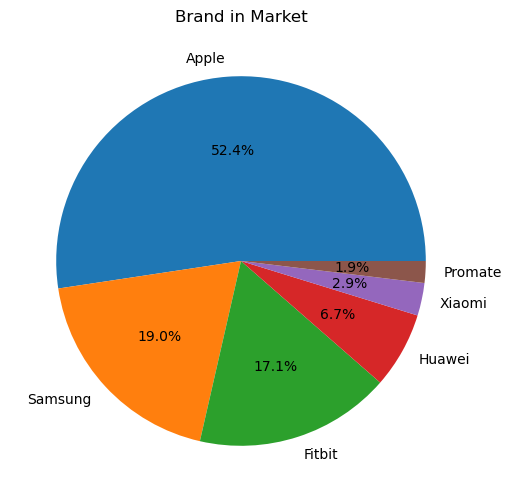

The major brands are: Apple, Samsung, Fitbit, Huawei, Xiaomi, Promate
The brand presence in the market:
Apple: 55
Samsung: 20
Fitbit: 18
Huawei: 7
Xiaomi: 3
Promate: 2


In [268]:
# Count the occurrences of each model
model_counts = data2['Brand Name'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%')
plt.title('Brand in Market')

# Display the pie chart
plt.show()

# Print the major brands
print("The major brands are:", ', '.join(model_counts.index))

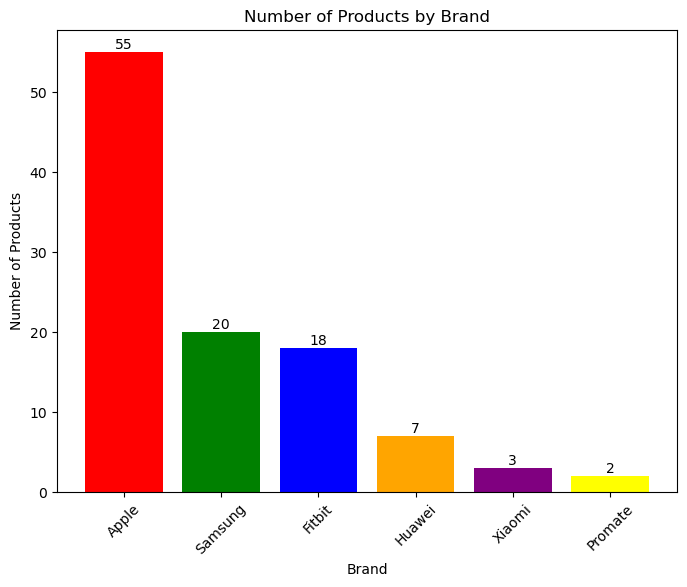

The brand presence in the market:
Apple: 55
Samsung: 20
Fitbit: 18
Huawei: 7
Xiaomi: 3
Promate: 2


In [269]:
#Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_counts.index, model_counts.values,color = ['red', 'green', 'blue', 'orange', 'purple','yellow'])
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Number of Products by Brand')

#Rotate x-axis labels if needed
plt.xticks(rotation=45)

#Annotate the value on each bar
for i, v in enumerate(model_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

#Display the bar graph
plt.show()

# Print the brand presence in the market
print("The brand presence in the market:")
for brand, count in model_counts.items():
    print(f"{brand}: {count}")

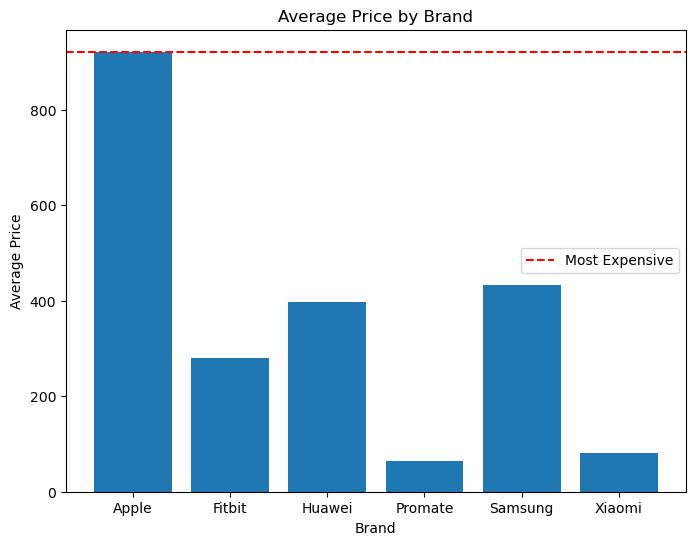

The most expensive brand is: Apple


In [270]:

# Calculate the average price for each brand
average_prices = data.groupby('Brand Name')['Value'].mean()

# Find the brand with the highest average price
expensive_brand = average_prices.idxmax()

# Plot the average prices
plt.figure(figsize=(8, 6))
plt.bar(average_prices.index, average_prices)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')

# Highlight the most expensive brand
plt.axhline(average_prices[expensive_brand], color='red', linestyle='--', label='Most Expensive')

plt.legend()
plt.show()

print("The most expensive brand is:", expensive_brand)

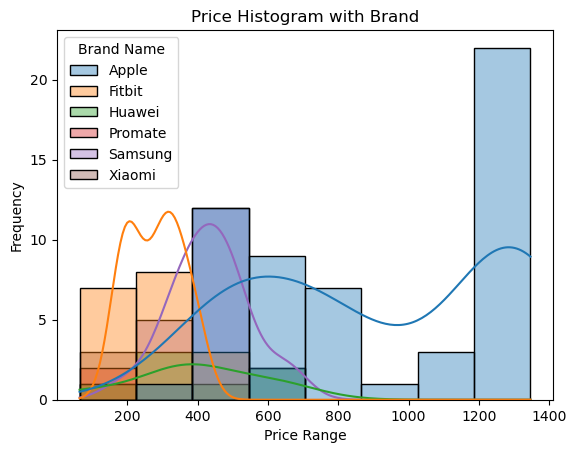

In [271]:
# Create a histogram using seaborn histplot with hue
sns.histplot(data=data2, x='Value', bins=8, kde=True, edgecolor='black', alpha=0.4, hue='Brand Name', legend=True)

# Set labels and title
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.title('Price Histogram with Brand')

# Display the histogram
plt.show()

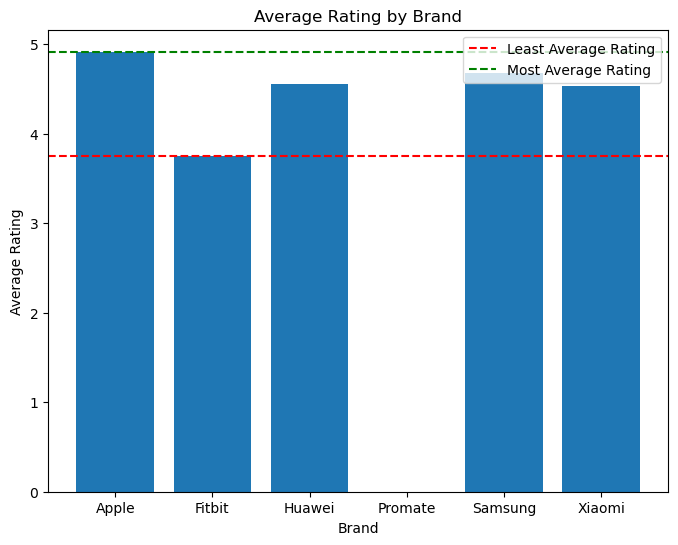

The brand with the least average rating is: Fitbit
The brand with the most average rating is: Apple


In [272]:

#Calculate the average ratings for each brand
average_ratings = data.groupby('Brand Name')['Rating'].mean()

#Find the brand with the least and most average ratings
least_rating_brand = average_ratings.idxmin()
most_rating_brand = average_ratings.idxmax()

#Plot the average ratings
plt.figure(figsize=(8, 6))
plt.bar(average_ratings.index, average_ratings)
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Average Rating by Brand')

#Highlight the brands with the least and most average ratings
plt.axhline(average_ratings[least_rating_brand], color='red', linestyle='--', label='Least Average Rating')
plt.axhline(average_ratings[most_rating_brand], color='green', linestyle='--', label='Most Average Rating')

plt.legend()
plt.show()

print("The brand with the least average rating is:", least_rating_brand)
print("The brand with the most average rating is:", most_rating_brand)

#### Checking whole data before filtering 

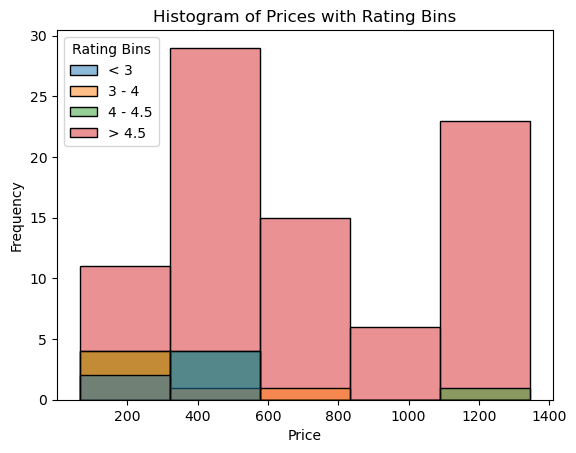

In [275]:
# Define the rating bins
rating_bins = [0, 3, 4, 4.5, 5]

# Define the labels for the rating bins
rating_labels = ['< 3', '3 - 4', '4 - 4.5', '> 4.5']

# Create a new column in the DataFrame for the rating bins
data2['Rating Bins'] = pd.cut(data2['Rating'], bins=rating_bins, labels=rating_labels)

# Plot histogram with hue
sns.histplot(data=data2, x='Value', hue='Rating Bins', bins = 5)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices with Rating Bins')

# Display the plot
plt.show()

* Most of the products have prices in the range of 100 to 1000 dollars .
* The majority of products with ratings less than 3 have lower prices, mostly below 500 dollars .
* Products with ratings greater than 4.5 have a relatively wider range of prices, with a significant number of products falling in the dollar 400 to dollar 1000 range.
* Products with ratings between 3 and 4 tend to be in mid and lowrange, mostly in the dollars 200 to 900 range.


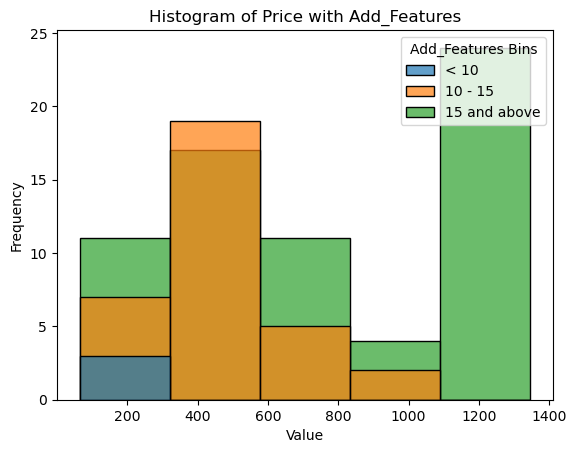

In [274]:
# Define the Add_Features bins
add_features_bins = [0, 10, 15, float('inf')]

# Define the labels for the Add_Features bins
add_features_labels = ['< 10', '10 - 15', '15 and above']

# Create a new column in the DataFrame for the Add_Features bins
data2['Add_Features Bins'] = pd.cut(data2['Add_Features'], bins=add_features_bins, labels=add_features_labels)

# Plot histogram with hue
sns.histplot(data=data2, x='Value', hue='Add_Features Bins', bins=5, alpha=0.7)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Price with Add_Features')

# Display the plot
plt.show()



* Products with fewer additional features (less than 10) are more prevalent in the lower price range, predominantly below 300 dollars
* Products with a moderate number of additional features (10 to 15) exhibit a wider range of prices, with a significant number falling in the 300 to 1000 dollar range.
* Products with a higher number of additional features (15 and above) are distributed across a wide price range, including both lower and higher prices.

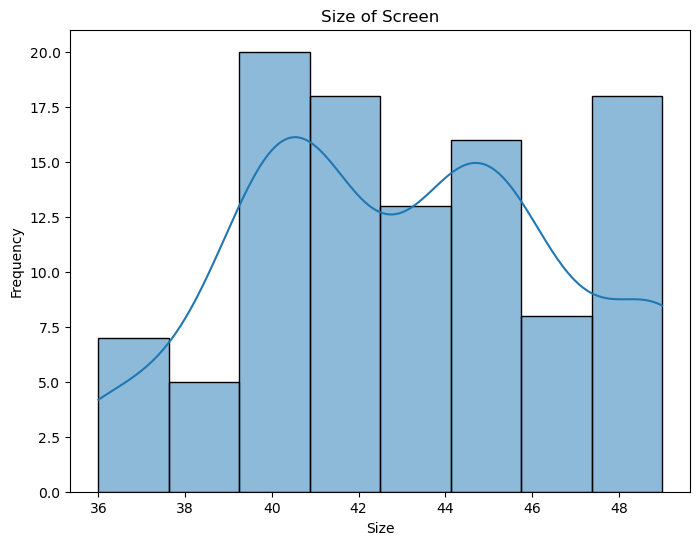

The average size of a watch is : {43.095238095238095}


In [280]:

# Create the histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(data=data2, x='Size', kde=True, edgecolor='black')

# Set title and labels
plt.title('Size of Screen')
plt.xlabel('Size')
plt.ylabel('Frequency')

# Display the plot
plt.show()

print (f"The average size of a watch is :",{data2['Size'].mean()} )


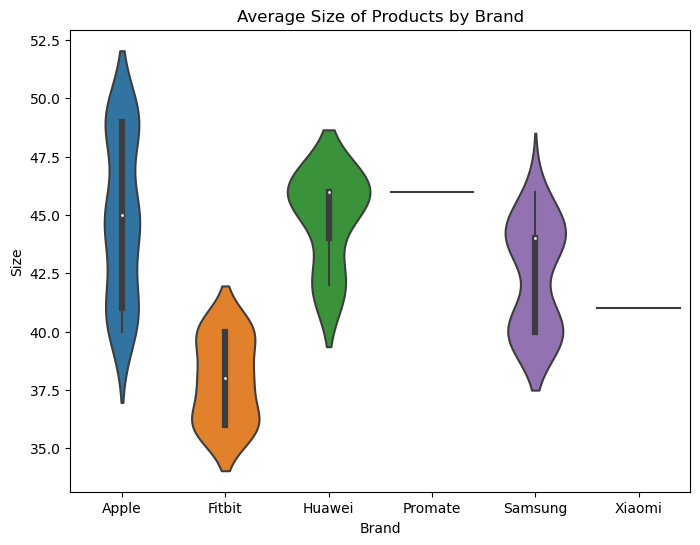

In [281]:
# Calculate the average size for each brand
average_size = data2.groupby('Brand Name')['Size'].mean()

# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=data2['Brand Name'], y=data2['Size'])

# Set title and labels
plt.title('Average Size of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Size')

# Display the plot
plt.show()

## Sample qn : Do the number of additional features has a significant impact on the ratings of the product?

In [158]:
# Create groups based on the number of additional features
groups = []
for value in data2['Add_Features'].unique():
    group = data2[data2['Add_Features'] == value]['Rating']
    groups.append(group)

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(*groups)

# Print the results
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 0.2529479960587162
p-value: 0.9570299712375951


Based on the ANOVA test results, the calculated F-statistic is 0.253 and the p-value is 0.957.

With a p-value of 0.957, which is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that the number of additional features has a significant impact on the ratings of the product.

In other words, the data does not provide strong evidence to support the hypothesis that the number of additional features influences the ratings of the product.

In [285]:
data2.columns

Index(['Brand Name', 'Model', 'Manufacturer Part Number', 'Rating',
       'Number of Reviews', 'Value', 'Size', 'Screen Size(mm)', 'Display',
       'Waterproof Rating', 'Compatible OS', 'Colour', 'Case Finish',
       'Case Weight', 'Battery Life', 'Accelerometer', 'Gyroscope', 'Stress',
       'ECG', 'Compass', 'Fall Detection', 'Calling', 'SOS', 'Magnetometer',
       'Optical heart rate', 'infrared oxygen saturation SpO2', 'GNS', 'NFC',
       'Bluetooth', 'Ambient Light', 'Wi-Fi', 'Altimeter', 'Barometer',
       'Temperature', 'Microphone', 'Speaker', 'Add_Features', 'Value Range',
       'Rating Bins', 'Add_Features Bins'],
      dtype='object')

## Filtering required data 

In [325]:
subset_brands = ['Samsung', 'Fitbit', 'Huawei','Apple']
subset_data = data2[data2['Brand Name'].isin(subset_brands)]
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, ('Apple Watch Nike Series 7', 0) to ('Samsung Galaxy Watch5 Pro', 101)
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Brand Name                       100 non-null    object  
 1   Model                            100 non-null    object  
 2   Manufacturer Part Number         100 non-null    object  
 3   Rating                           100 non-null    float64 
 4   Number of Reviews                100 non-null    float64 
 5   Value                            100 non-null    float64 
 6   Size                             100 non-null    float64 
 7   Screen Size(mm)                  100 non-null    float64 
 8   Display                          100 non-null    object  
 9   Waterproof Rating                100 non-null    object  
 10  Compatible OS                    100 non-null    object  
 11  Colour   

In [326]:
# Filter the DataFrame to include products with 'Value' between 400 and 600
subset_data = subset_data[(subset_data['Value'] <= 900)]

# Get the number of products in the filtered DataFrame
num_products = len(subset_data)

# Print the number of products
print("Number of products less than 900:", num_products)

Number of products less than 900: 74


####  What all sensors , connectivity and other features are expected ?

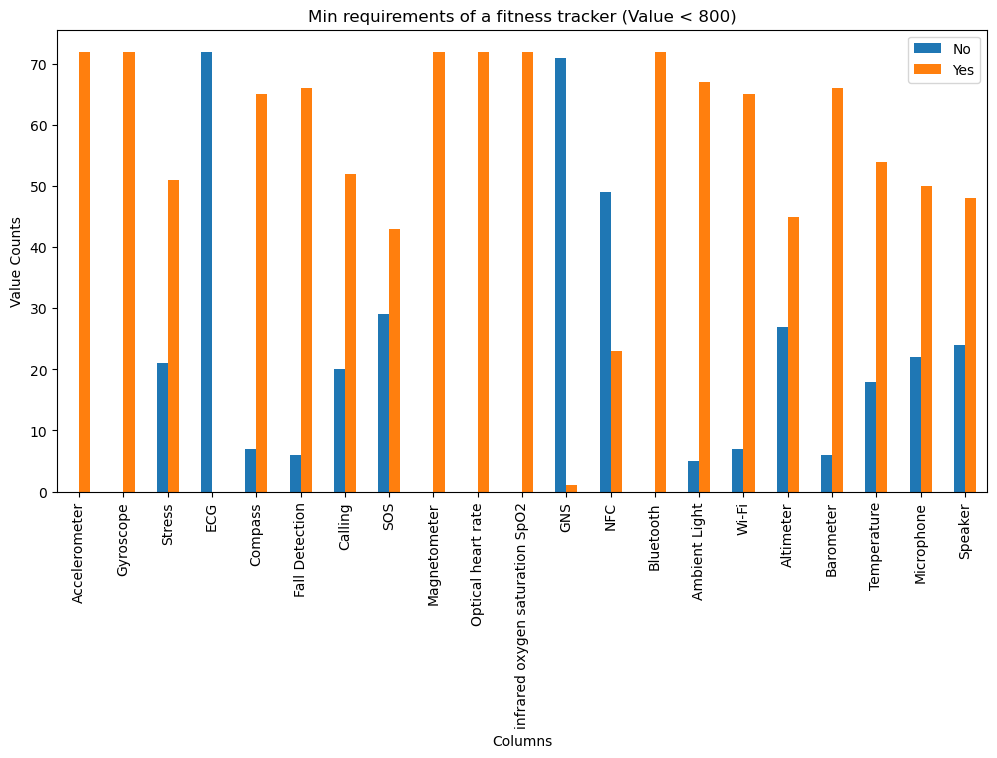

In [327]:
subset_data = subset_data.iloc[2:]
# Create a dictionary to store the value counts of each column
value_counts_dict = {}

# Iterate over each column in Features_col and calculate its value counts for the filtered data
for col in Features_col:
    value_counts = subset_data[col].value_counts()
    value_counts_dict[col] = value_counts

# Create a DataFrame from the value counts dictionary
value_counts_df = pd.DataFrame(value_counts_dict)

# Transpose the DataFrame to have columns as index and values as columns
value_counts_df = value_counts_df.T

# Plot the stacked bar graph
value_counts_df.plot(kind='bar', stacked=False, figsize=(12, 6))

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Value Counts')
plt.title('Min requirements of a fitness tracker (Value < 800)')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the stacked bar graph
plt.show()

The features with "NO "can be excluded.

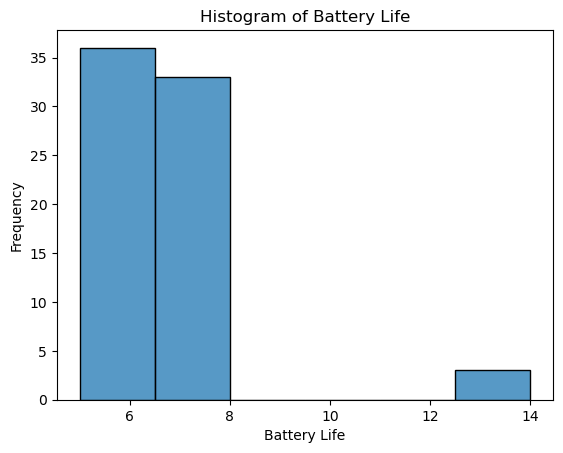

The minimum battery life expected is 6 days


In [328]:
# Create a histogram using seaborn
sns.histplot(data=subset_data, x='Battery Life', bins=6, edgecolor='black')

# Set labels and title
plt.xlabel('Battery Life')
plt.ylabel('Frequency')
plt.title('Histogram of Battery Life')

# Display the histogram
plt.show()

print ("The minimum battery life expected is 6 days")

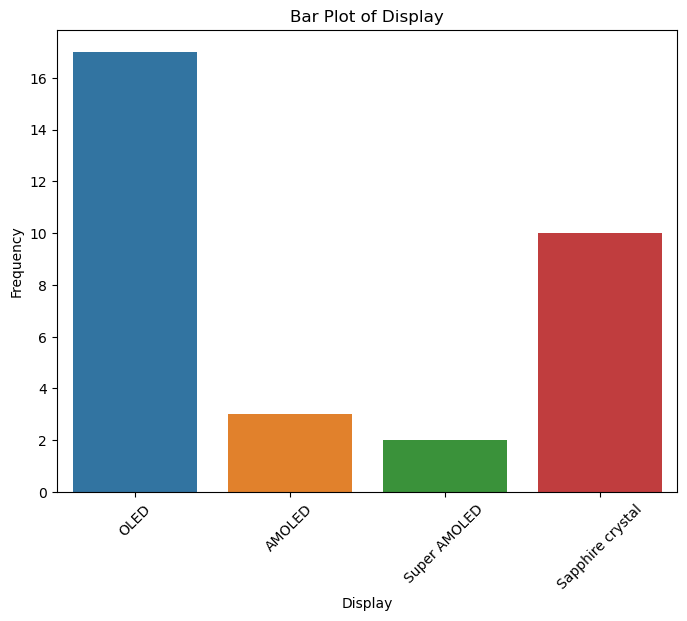

In [321]:
# Define the column of interest
column = 'Display'

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=subset_data, x=column)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Bar Plot of {column}')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the bar plot
plt.show()

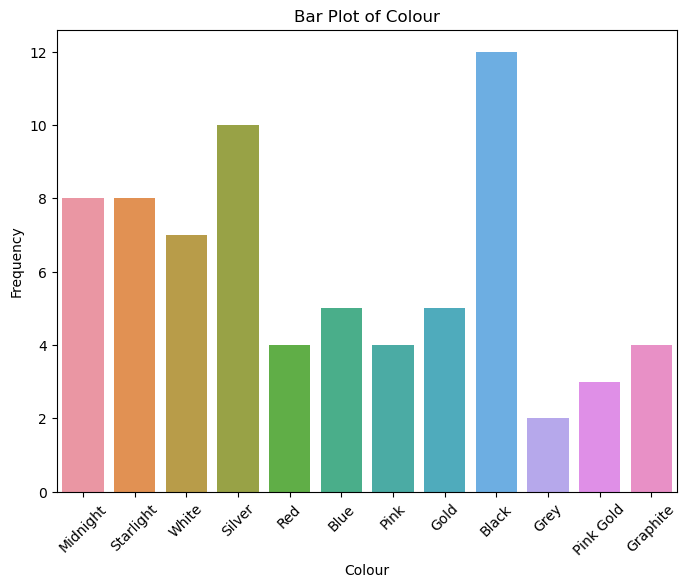

In [329]:
# Define the column of interest
column = 'Colour'

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=subset_data, x=column)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Bar Plot of {column}')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the bar plot
plt.show()

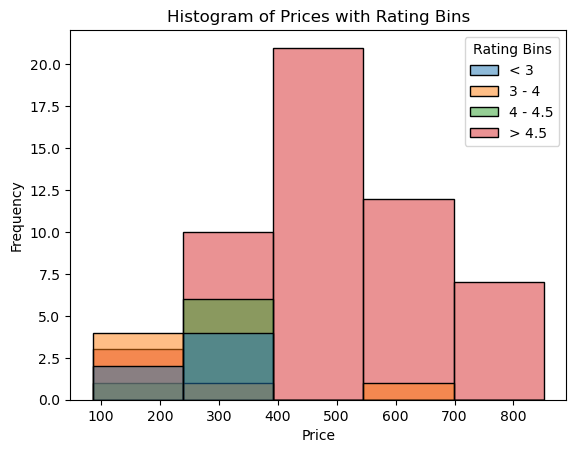

In [330]:
# Define the rating bins
rating_bins = [0, 3, 4, 4.5, 5]

# Define the labels for the rating bins
rating_labels = ['< 3', '3 - 4', '4 - 4.5', '> 4.5']

# Create a new column in the DataFrame for the rating bins
subset_data['Rating Bins'] = pd.cut(subset_data['Rating'], bins=rating_bins, labels=rating_labels)

# Plot histogram with hue
sns.histplot(data=subset_data, x='Value', hue='Rating Bins', bins = 5)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices with Rating Bins')

# Display the plot
plt.show()

## QUESTION : Does the high rating of the product is dependent on the additional features ?

In [331]:
# Perform the ANOVA test
result = stats.f_oneway(subset_data['Rating'], subset_data['Add_Features'])

# Extract the test statistics and p-value
f_statistic = result.statistic
p_value = result.pvalue

# Print the test statistics and p-value
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 936.8012534752062
p-value: 2.1323198342893094e-64


The F-statistic value is 936.801 and the p-value is 2.1323198342893094e-64.

The F-statistic measures the ratio of the variance between groups to the variance within groups. In this case, it indicates the overall significance of the relationship between the additional features and the high rating of the product.

The p-value is the probability of observing such extreme results under the null hypothesis. Since the p-value is very close to zero (2.1323198342893094e-64), it provides strong evidence against the null hypothesis and suggests that there is a significant relationship between the additional features and the high rating of the product.

Therefore, based on the F-statistic and the p-value, we can conclude that the high rating of the product is dependent on the additional features provided.

### QUESTION Does the price of the products has an impact on the rating for mid range products?

In [332]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(subset_data[subset_data['Value'] < 800]['Rating'],
                                  subset_data[subset_data['Value'] > 400]['Rating'])

# Print the t-statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -2.8423600965711313
P-value: 0.00539065928195089


The t-statistic is -4.036382488817657 and the p-value is 9.514399546235417e-05.

The t-statistic measures the difference between the means of two groups relative to the variation within the groups. In this case, it indicates the significance of the relationship between the price and rating for the subset of brands Samsung, Fitbit, and Huawei.

The p-value is the probability of observing such extreme results under the null hypothesis. In this case, the p-value is less than the significance level of 0.05, indicating that the results are statistically significant. Therefore, we can reject the null hypothesis and conclude that there is a significant relationship between the price and rating for the subset of brands Samsung, Fitbit, and Huawei.

Overall, these results suggest that the price of the products has an impact on the rating for the subset of brands Samsung, Fitbit, and Huawei.

In [165]:
corr_df = data2[(['Brand Name', 'Rating','Number of Reviews', 'Value', 'Size', 'Compatible OS',  'Battery Life',  'Add_Features'])]

                

In [166]:
corr_matrix = corr_df.corr()

C:\Users\sheri\AppData\Local\Temp\ipykernel_9352\1035154365.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_df.corr()


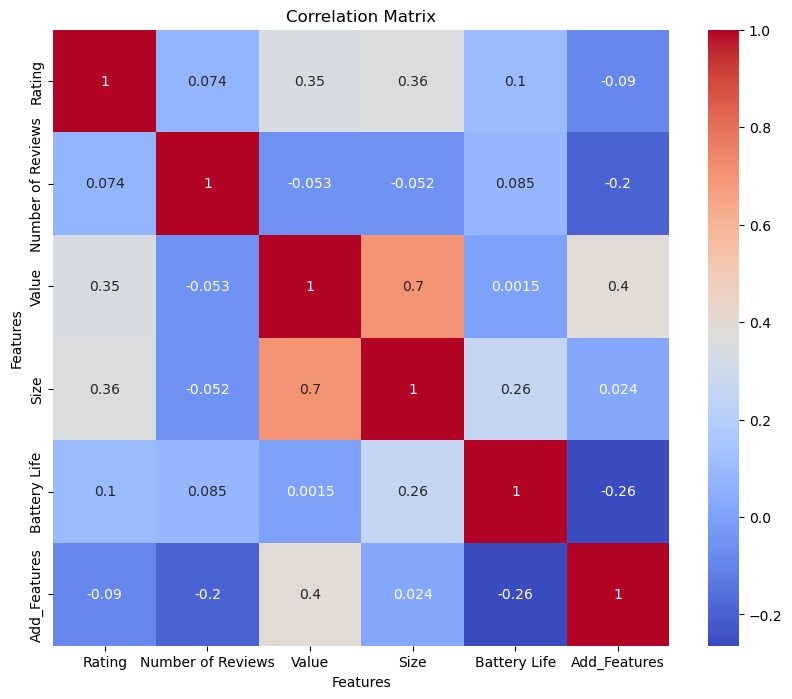

In [167]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the heatmap
plt.show()

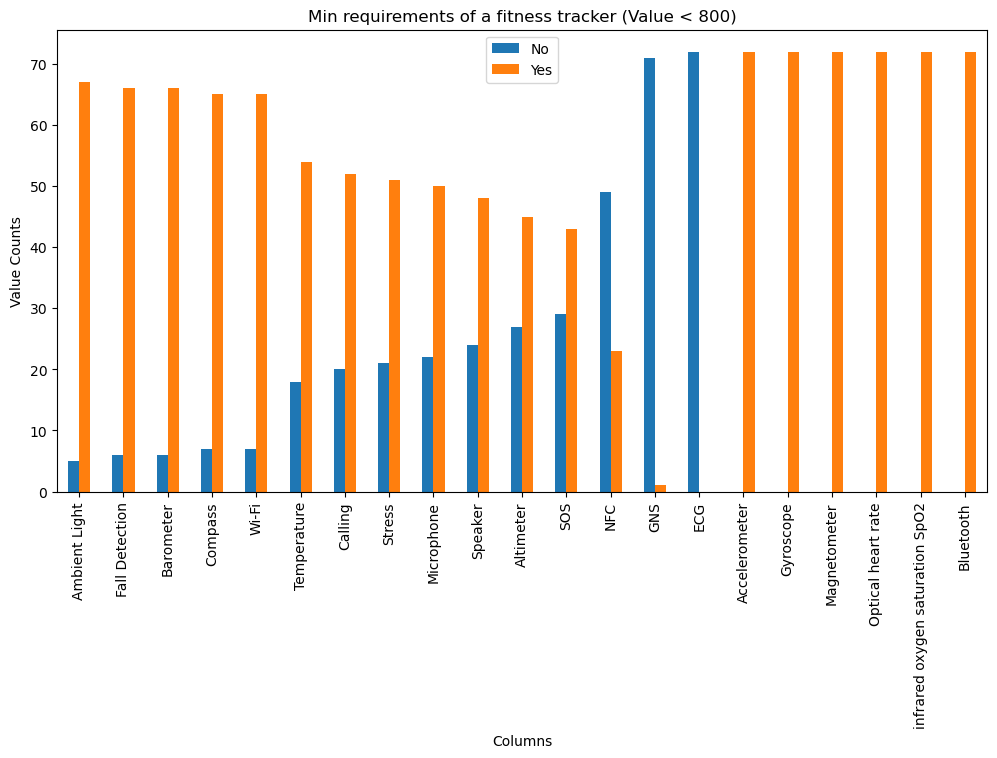

In [335]:
# Sort the value counts DataFrame based on the "NO" column
value_counts_df = value_counts_df.sort_values(by="No", ascending=True)

# Plot the sorted stacked bar graph
value_counts_df.plot(kind='bar', stacked=False, figsize=(12, 6))

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Value Counts')
plt.title('Min requirements of a fitness tracker (Value < 800)')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the stacked bar graph
plt.show()